In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

C:\Users\vasanthan.vasudevan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
mnist = keras.datasets.mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train /= 255
X_test /= 255

In [7]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [8]:
X_train.shape

(60000, 784)

In [9]:
Y_train = tf.keras.utils.to_categorical(Y_train,10)

Y_test = tf.keras.utils.to_categorical(Y_test,10)

In [10]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10))

### Design Model

In [11]:
model1 = Sequential()
model2 = Sequential()

#### Single Layer Perceptron

In [12]:
model1.add(Dense(10, input_shape=(784,), name='Dense1', activation='softmax'))

C:\Users\vasanthan.vasudevan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model1.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model1.fit(X_train, Y_train, batch_size = 100, epochs=10, validation_split=0.2)


Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.8265 - loss: 0.6988 - val_accuracy: 0.9027 - val_loss: 0.3862
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9003 - loss: 0.3717 - val_accuracy: 0.9128 - val_loss: 0.3211
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9109 - loss: 0.3265 - val_accuracy: 0.9189 - val_loss: 0.3005
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9149 - loss: 0.3061 - val_accuracy: 0.9206 - val_loss: 0.2859
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9185 - loss: 0.2930 - val_accuracy: 0.9221 - val_loss: 0.2802
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9208 - loss: 0.2844 - val_accuracy: 0.9237 - val_loss: 0.2744
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9229 - loss: 0.2781 - val_accuracy: 0.9271 - val_loss: 0.2706
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9232 - loss: 0.2730 - val_acc

#### Multi Layer Perceptron

In [15]:
model2.add(Dense(60, input_shape=(784,), name='Dense_Layer_1', activation='relu'))
model2.add(Dense(50, name='Dense_Layer_2', activation='relu'))
model2.add(Dense(10, name='Denser_Layer_output', activation='softmax'))

In [16]:
model2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
Mult_model = model2.fit(X_train, Y_train, batch_size = 100, epochs=10, validation_split=0.2)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8789 - loss: 0.4282 - val_accuracy: 0.9418 - val_loss: 0.1999
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9489 - loss: 0.1749 - val_accuracy: 0.9575 - val_loss: 0.1484
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9624 - loss: 0.1273 - val_accuracy: 0.9622 - val_loss: 0.1297
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9697 - loss: 0.1026 - val_accuracy: 0.9628 - val_loss: 0.1230
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9743 - loss: 0.0843 - val_accuracy: 0.9652 - val_loss: 0.1159
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9775 - loss: 0.0731 - val_accuracy: 0.9671 - val_loss: 0.1100
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9808 - loss: 0.0626 - val_accuracy: 0.9697 - val_loss: 0.1027
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9834 - loss: 0.0539 - 

In [19]:
import matplotlib.pyplot as plt

In [20]:
Mult_model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

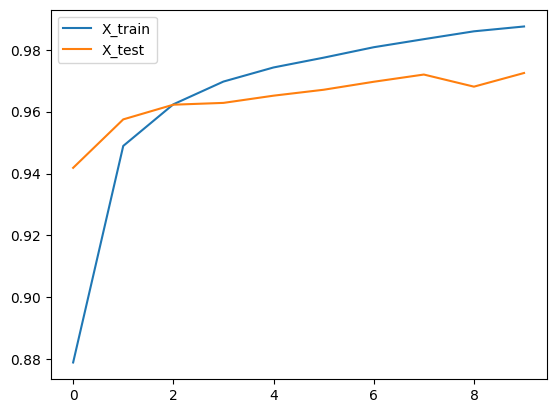

In [25]:
plt.plot(Mult_model.history['accuracy'])
plt.plot(Mult_model.history['val_accuracy'])
plt.legend(['X_train','X_test'])

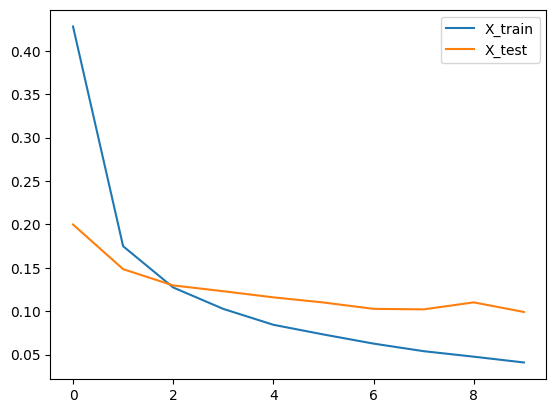

In [26]:
plt.plot(Mult_model.history['loss'])
plt.plot(Mult_model.history['val_loss'])
plt.legend(['X_train','X_test'])

#### Multi Layer 2

In [27]:
model3 = Sequential()

In [28]:
model3.add(Dense(100, input_shape=(784,), name='Dense_Layer_1', activation='relu'))
model3.add(Dense(100, name='Dense_Layer_2', activation='relu'))
model3.add(Dense(100, name='Dense_Layer_3', activation='relu'))
model3.add(Dense(50, name='Dense_Layer_4', activation='relu'))
model3.add(Dense(50, name='Dense_Layer_5', activation='relu'))
model3.add(Dense(10, name='Denser_Layer_output', activation='softmax'))

C:\Users\vasanthan.vasudevan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model3.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
Mult_model_2 = model3.fit(X_train, Y_train, batch_size = 100, epochs=10, validation_split=0.2)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.8800 - loss: 0.4032 - val_accuracy: 0.9467 - val_loss: 0.1917
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9552 - loss: 0.1493 - val_accuracy: 0.9597 - val_loss: 0.1357
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9678 - loss: 0.1066 - val_accuracy: 0.9628 - val_loss: 0.1214
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9748 - loss: 0.0812 - val_accuracy: 0.9690 - val_loss: 0.1099
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9796 - loss: 0.0634 - val_accuracy: 0.9680 - val_loss: 0.1114
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9835 - loss: 0.0526 - val_accuracy: 0.9693 - val_loss: 0.1072
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9856 - loss: 0.0453 - val_accuracy: 0.9711 - val_loss: 0.1023
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9878 - loss: 0.0378 - 

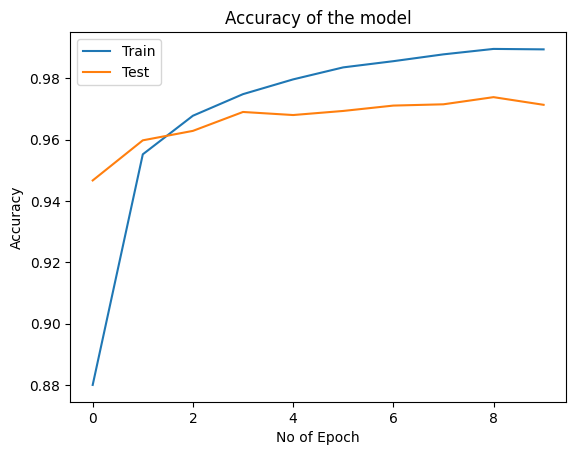

In [33]:
plt.plot(Mult_model_2.history['accuracy'])
plt.plot(Mult_model_2.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [39]:
img_res = X_test[2].reshape(1,784)
predicted = model3.predict(img_res)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


In [40]:
import numpy as np 
predicted_val = np.argmax(predicted)

Text(0.5, 1.0, 'Original : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | Predicted : 1')

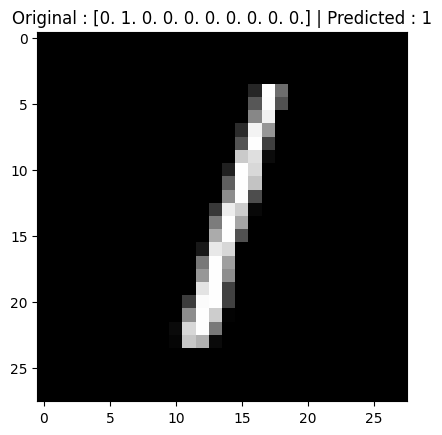

In [42]:
plt.imshow(img_res.reshape(28,28), cmap='grey')
plt.title(f'Original : {Y_test[2]} | Predicted : {predicted_val}')